In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import sys, os
from math import ceil
import numpy as np
import pandas as pd
import seaborn as sb
from scipy.spatial.transform import Rotation as R
from scipy import stats
import mdtraj as md
import tables as tb
import nglview as nv
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

up_ver = "upside2-md"
upside_utils_dir = os.path.expanduser("~/{}/py".format(up_ver))
sys.path.append(upside_utils_dir)
import mdtraj_upside as mu

Very Important: All distances are in nanometers for MDTraj


In [3]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.labelsize'] = 'medium'
mpl.rcParams['ytick.labelsize'] = 'medium'
mpl.rcParams['xtick.labelsize'] = 'medium'
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['svg.fonttype'] = 'none'

In [4]:
base_dir = "/home/okleinmann/scratch-midway2/"
up_indir = base_dir + "up_input/"
pdb_id = "1hk9_model"
n_rep = 20

output_dir = base_dir + "runs/constT/1hk9-random-walk/"

init_fn = up_indir + "{}.initial.npy".format(pdb_id)
fasta_fn = up_indir + "{}.fasta".format(pdb_id)
chain_breaks_fn = up_indir + "{}.chain_breaks".format(pdb_id)

traj = mu.load_upside_traj(init_fn, from_init=True, fasta_fn=fasta_fn, chain_breaks_fn=chain_breaks_fn)

acid_sele = traj.top.select("(resname ASP or resname GLU) and name CA")
base_sele = traj.top.select("(resname LYS or resname ARG) and name CA")

In [5]:
print(traj)

<mdtraj.Trajectory with 1 frames, 3600 atoms, 612 residues, without unitcells>


In [6]:
view = nv.NGLWidget()
view.add_trajectory(traj)
view.clear_representations()
view.add_cartoon(color='gray')
view.add_spacefill(selection=acid_sele, color='red')
view.add_spacefill(selection=base_sele, color='blue')

view.camera = 'orthographic'
view.parameters = {
    "clipNear": -100, "clipFar": 1000,
    "fogNear": 0, "fogFar": 1000,
}
view

NGLWidget()

In [7]:
dssp = md.compute_dssp(traj[0])[0]
for i, ss in enumerate(dssp):
    print (i, ss)

0 C
1 C
2 C
3 C
4 H
5 H
6 H
7 H
8 H
9 H
10 H
11 H
12 H
13 H
14 H
15 H
16 H
17 C
18 C
19 C
20 E
21 E
22 E
23 E
24 E
25 E
26 C
27 C
28 C
29 C
30 E
31 E
32 E
33 E
34 E
35 E
36 E
37 E
38 E
39 C
40 C
41 C
42 E
43 E
44 E
45 E
46 E
47 C
48 C
49 C
50 E
51 E
52 E
53 E
54 E
55 H
56 H
57 H
58 E
59 E
60 E
61 E
62 E
63 E
64 C
65 C
66 C
67 C
68 C
69 C
70 C
71 C
72 C
73 C
74 C
75 C
76 C
77 C
78 C
79 C
80 C
81 C
82 C
83 C
84 C
85 C
86 C
87 C
88 C
89 C
90 C
91 C
92 C
93 C
94 C
95 C
96 C
97 C
98 C
99 C
100 C
101 C
102 C
103 C
104 C
105 C
106 H
107 H
108 H
109 H
110 H
111 H
112 H
113 H
114 H
115 H
116 H
117 H
118 H
119 C
120 C
121 C
122 E
123 E
124 E
125 E
126 E
127 E
128 C
129 C
130 C
131 C
132 E
133 E
134 E
135 E
136 E
137 E
138 E
139 E
140 E
141 C
142 C
143 C
144 E
145 E
146 E
147 E
148 E
149 C
150 C
151 C
152 E
153 E
154 E
155 E
156 E
157 H
158 H
159 H
160 E
161 E
162 E
163 E
164 E
165 E
166 C
167 C
168 C
169 C
170 C
171 C
172 C
173 C
174 C
175 C
176 C
177 C
178 C
179 C
180 C
181 C
182 C
183 C
184 C


In [8]:
restr_list = []
for i in range(traj.n_chains):
    restr_list.append([i*102, i*102+66])

In [9]:
restr_str = []
a_sele = []
for grp in restr_list:
    restr_str.append("{}-{}".format(grp[0], grp[1]))
    
    # for visualization check
    a_sele.append(traj.top.select("resid {} to {}".format(grp[0], grp[1])))
a_sele = np.concatenate(a_sele)
print (restr_str)

['0-66', '102-168', '204-270', '306-372', '408-474', '510-576']


In [10]:
# Visualization check
view = nv.NGLWidget()
view.add_trajectory(traj[0])
view.clear_representations()
view.add_backbone(selection=a_sele, color="magenta")
view.camera = 'orthographic'
view

NGLWidget()

In [11]:
traj_fn = output_dir + "{}.{}.up".format(pdb_id, 0)
traj = mu.load_upside_traj(traj_fn, stride=1)

restr_list = []
for i in range(traj.n_chains):
    restr_list.append([i*102, i*102+66])

a_sele = []
for grp in restr_list:
    a_sele.append(traj.top.select("resid {} to {}".format(grp[0], grp[1])))
a_sele = np.concatenate(a_sele)
traj.superpose(traj[0], atom_indices=a_sele)

acid_sele = traj.top.select("(resname ASP or resname GLU) and name CA")
base_sele = traj.top.select("(resname LYS or resname ARG) and name CA")

view = nv.NGLWidget()
view.add_trajectory(traj[:])
view.clear_representations()
view.add_cartoon(color='gray')
view.add_spacefill(selection=acid_sele, color='red')
view.add_spacefill(selection=base_sele, color='blue')

view.camera = 'orthographic'
view.parameters = {
    "clipNear": -100, "clipFar": 1000,
    "fogNear": 0, "fogFar": 1000,
}
view

NGLWidget(max_frame=999)

In [12]:
xyz = traj.xyz

In [13]:
xyz[:, acid_sele, :]

array([[[ 0.23427932,  1.9911798 , -0.60569894],
        [ 0.8116793 ,  3.0340798 ,  0.13060108],
        [ 1.3654794 ,  2.1622798 ,  0.11460108],
        ...,
        [ 7.049279  ,  6.83258   , -0.4215989 ],
        [ 7.4152794 ,  6.73768   , -0.39489895],
        [ 7.9735794 ,  6.45028   , -0.03089892]],

       [[ 0.23181996,  2.1530807 , -0.57989705],
        [ 0.34124765,  3.5102487 ,  0.72905564],
        [ 1.3406745 ,  2.6355627 ,  0.2902795 ],
        ...,
        [ 7.5267687 ,  5.567982  , -0.87505776],
        [ 7.505344  ,  5.919028  , -1.0675827 ],
        [ 7.6956944 ,  6.4083304 , -1.4010562 ]],

       [[ 0.9599366 ,  2.4321432 , -1.3064687 ],
        [ 0.2565063 ,  3.1540442 , -0.12035578],
        [ 0.89803976,  2.8494322 ,  0.6646293 ],
        ...,
        [ 6.483571  ,  6.158872  , -0.7131013 ],
        [ 6.630385  ,  6.1360765 , -0.35610974],
        [ 6.917672  ,  6.199483  ,  0.14373505]],

       ...,

       [[ 2.306129  ,  0.0642233 , -5.123181  ],
        [ 3

# E2E Distances

In [14]:
disc_center = traj.xyz[0, a_sele, :].mean(axis=0)

e2e_dists = []
for i in range(traj.n_chains):
    ch_a = traj.top.chain(i).n_atoms
    arm_end = traj.xyz[:, i*ch_a+ch_a-1, :]
    e2e_dists.append(10.*np.linalg.norm(arm_end-disc_center, axis=1))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


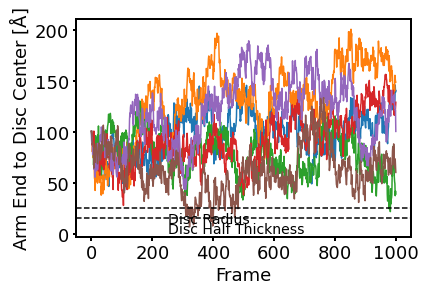

In [15]:
plt.figure(facecolor='w')
for i in range(traj.n_chains):    
    plt.plot(range(traj.n_frames), e2e_dists[i])
    
plt.xlabel('Frame')
plt.ylabel('Arm End to Disc Center [$\mathrm{\AA}$]')

plt.axhline(y=25, color='k', ls='--')
plt.axhline(y=15, color='k', ls='--')

plt.annotate("Disc Radius", xy=(250, 25), xytext=(0,-15),
             textcoords='offset pixels', fontsize=14)
plt.annotate("Disc Half Thickness", xy=(250, 15), xytext=(0,-15),
             textcoords='offset pixels', fontsize=14)

plt.show()

# ARM-Disc Charge Contacts

In [16]:
cutoff = 10.

arms_in_contact = []

for i in range(traj.n_chains):
    arm_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(i, i*102+66))
    pair_list = np.array([(i, j) for i in arm_charges for j in base_sele])
    
    dists = 10.*md.compute_distances(traj, pair_list, periodic=False, opt=True)
    is_contact = dists < cutoff
    arms_in_contact.append(is_contact.any(axis=1))
arms_in_contact = np.stack(arms_in_contact, axis=1).sum(axis=1)

In [17]:
dists.shape

(1000, 192)

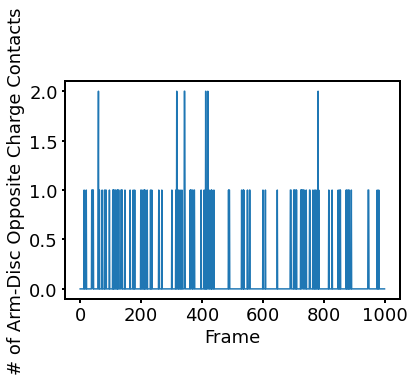

In [18]:
plt.figure(facecolor='w')    
plt.plot(range(traj.n_frames), arms_in_contact)
    
plt.xlabel('Frame')
plt.ylabel('# of Arm-Disc Opposite Charge Contacts')
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


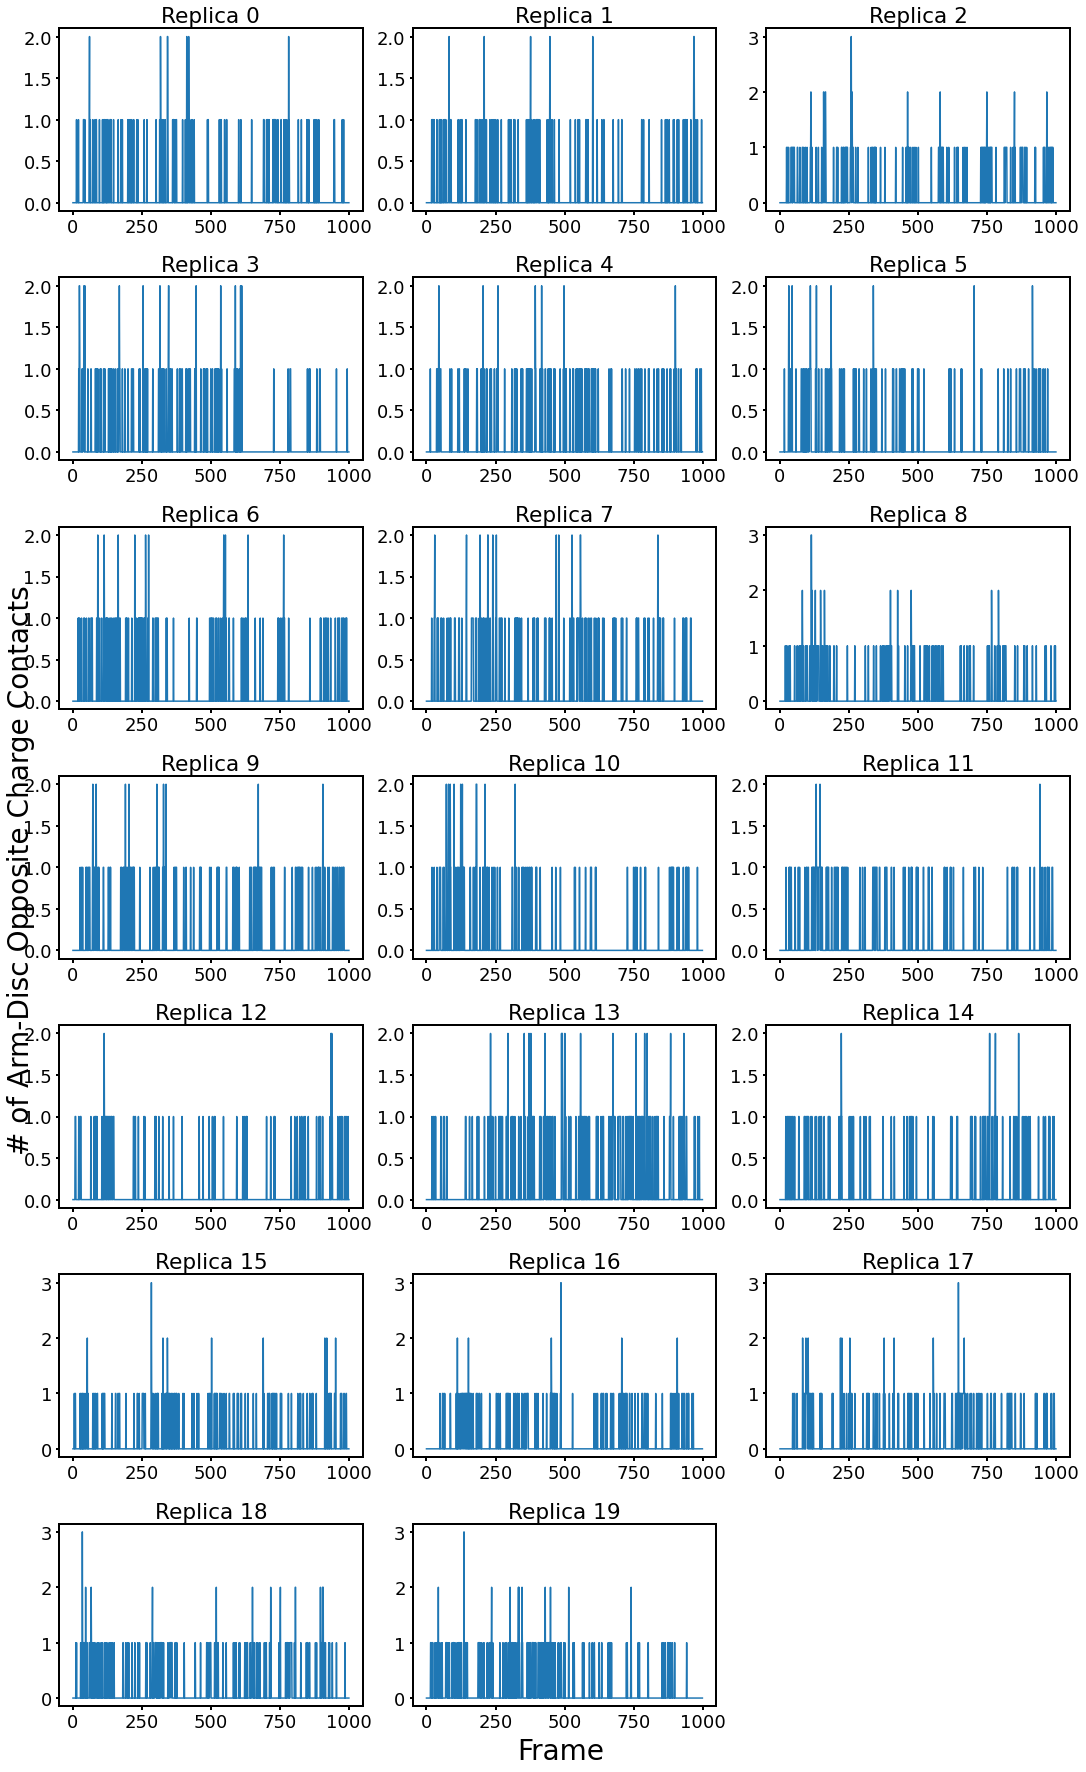

In [19]:
cutoff = 10.

n = 3
m = -(-n_rep//n)
nrows = int(ceil(n_rep/n))
fig0 = plt.figure(figsize=(5*n,3.5*m))

for rep in range(n_rep):
    plt.subplot(nrows, n, rep+1)
    
    traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
    traj = mu.load_upside_traj(traj_fn, stride=1)
    
    arms_in_contact = []
    for i in range(traj.n_chains):
        arm_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(i, i*102+66))
        pair_list = np.array([(i, j) for i in arm_charges for j in base_sele])

        dists = 10.*md.compute_distances(traj, pair_list, periodic=False, opt=True)
        is_contact = dists < cutoff
        arms_in_contact.append(is_contact.any(axis=1))
    arms_in_contact = np.stack(arms_in_contact, axis=1).sum(axis=1)
    
    plt.plot(range(traj.n_frames), arms_in_contact)
    plt.title("Replica {}".format(rep))

fig0.text(0., 0.5, '# of Arm-Disc Opposite Charge Contacts', fontsize=28, ha='center', va='center', rotation='vertical')
fig0.text(0.5, 0., 'Frame', fontsize=28, ha='center', va='center')
plt.tight_layout()

# ARM-Disc Side Preferance

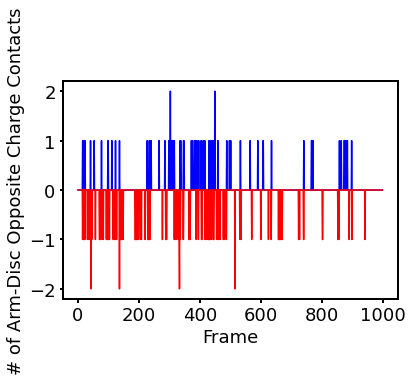

Total number of top contacts: 78
Total number of bottom contacts: 125


In [20]:
top_contacts = []
bottom_contacts = []
top_charges=[]
bottom_charges=[]

for i in range(traj.n_chains):
    top_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i, i*102+2,i*102+15,i*102+16,i*102+55)).tolist())
    bottom_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65)).tolist())
    # print(top_charges)
    # print(bottom_charges)

for i in range(traj.n_chains):
    arm_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(i, i*102+66))
    top_pair_list = np.array([(i, j) for i in arm_charges for j in top_charges])
    bottom_pair_list = np.array([(i, j) for i in arm_charges for j in bottom_charges])
    
    top_dists = 10.*md.compute_distances(traj, top_pair_list, periodic=False, opt=True)
    bottom_dists = 10.*md.compute_distances(traj, bottom_pair_list, periodic=False, opt=True)
    is_contact = top_dists < cutoff
    top_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_dists < cutoff
    bottom_contacts.append(is_contact.any(axis=1))

# print(len(top_contacts))
# print(top_contacts)
top_contacts = np.stack(top_contacts, axis=1).sum(axis=1)
bottom_contacts = np.stack(bottom_contacts, axis=1).sum(axis=1)
    
plt.figure(facecolor='w')    
plt.plot(range(traj.n_frames), top_contacts,color="b")
plt.plot(range(traj.n_frames), bottom_contacts*-1,color="r")

    
plt.xlabel('Frame')
plt.ylabel('# of Arm-Disc Opposite Charge Contacts')
plt.show()

print("Total number of top contacts: {}".format(np.sum(top_contacts)))
print("Total number of bottom contacts: {}".format(np.sum(bottom_contacts)))

In [21]:
asdas=[3,2,1]
print(asdas.append(['x','y','z']))
print(str(asdas))

None
[3, 2, 1, ['x', 'y', 'z']]


In [22]:
top_contacts = []
bottom_contacts = []

for i in range(traj.n_chains):
    top_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i, i*102+2,i*102+15,i*102+16,i*102+55)).tolist())
    bottom_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65)).tolist())
    
for i in range(traj.n_chains):
    bottom_charges = traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65))
    top_pair_list = np.array([(i, j) for i in arm_charges for j in top_charges])
    bottom_pair_list = np.array([(i, j) for i in arm_charges for j in bottom_charges])
    
    top_dists = 10.*md.compute_distances(traj, top_pair_list, periodic=False, opt=True)
    bottom_dists = 10.*md.compute_distances(traj, bottom_pair_list, periodic=False, opt=True)
    is_contact = top_dists < cutoff
    top_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_dists < cutoff
    bottom_contacts.append(is_contact.any(axis=1))

top_contacts = np.stack(top_contacts, axis=1).sum(axis=1)
bottom_contacts = np.stack(bottom_contacts, axis=1).sum(axis=1)

No handles with labels found to put in legend.


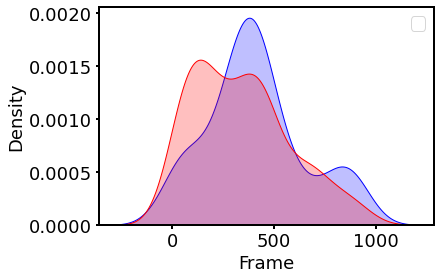

Total number of top contacts: 78
Total number of bottom contacts: 125


In [23]:
top_contacts = []
bottom_contacts = []

top_charges=[]
bottom_charges=[]

for i in range(traj.n_chains):
    top_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i, i*102+2,i*102+15,i*102+16,i*102+55)).tolist())
    bottom_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65)).tolist())
    
for i in range(traj.n_chains):
    arm_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(i, i*102+66))
    top_pair_list = np.array([(i, j) for i in arm_charges for j in top_charges])
    bottom_pair_list = np.array([(i, j) for i in arm_charges for j in bottom_charges])
    
    top_dists = 10.*md.compute_distances(traj, top_pair_list, periodic=False, opt=True)
    bottom_dists = 10.*md.compute_distances(traj, bottom_pair_list, periodic=False, opt=True)
    is_contact = top_dists < cutoff
    top_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_dists < cutoff
    bottom_contacts.append(is_contact.any(axis=1))

top_contacts = np.stack(top_contacts, axis=1).sum(axis=1)
bottom_contacts = np.stack(bottom_contacts, axis=1).sum(axis=1)

top_contacts_kde = []
for i in range(0,len(top_contacts)):
    if top_contacts[i] == 1:
        top_contacts_kde.append(i)
    if top_contacts[i] == 2:
        top_contacts_kde.append(i)
        top_contacts_kde.append(i)
    if top_contacts[i] == 3:
        top_contacts_kde.append(i)
        top_contacts_kde.append(i)
        top_contacts_kde.append(i)
    if bottom_contacts[i] == 4:
        bottom_contacts_kde.append(i)
        bottom_contacts_kde.append(i)
        bottom_contacts_kde.append(i)      
        bottom_contacts_kde.append(i)    
        
bottom_contacts_kde = []
for i in range(0,len(bottom_contacts)):
    if bottom_contacts[i] == 1:
        bottom_contacts_kde.append(i)
    if bottom_contacts[i] == 2:
        bottom_contacts_kde.append(i)
        bottom_contacts_kde.append(i)
    if bottom_contacts[i] == 3:
        bottom_contacts_kde.append(i)
        bottom_contacts_kde.append(i)
        bottom_contacts_kde.append(i)
    if bottom_contacts[i] == 4:
        bottom_contacts_kde.append(i)
        bottom_contacts_kde.append(i)
        bottom_contacts_kde.append(i)      
        bottom_contacts_kde.append(i)

plt.figure(facecolor='w')    
sb.kdeplot(top_contacts_kde,gridsize=1000,shade=True,color="b")
sb.kdeplot(bottom_contacts_kde,gridsize=1000,shade=True,color="r")

    
plt.xlabel('Frame')
plt.ylabel('Density')
plt.legend()
plt.show()

print("Total number of top contacts: {}".format(np.sum(top_contacts)))
print("Total number of bottom contacts: {}".format(np.sum(bottom_contacts)))

51 top contacts in replica 0
81 bottom contacts in replica 0
48 top contacts in replica 1
90 bottom contacts in replica 1
45 top contacts in replica 2
136 bottom contacts in replica 2
61 top contacts in replica 3
98 bottom contacts in replica 3
53 top contacts in replica 4
112 bottom contacts in replica 4
61 top contacts in replica 5
82 bottom contacts in replica 5
72 top contacts in replica 6
89 bottom contacts in replica 6
65 top contacts in replica 7
111 bottom contacts in replica 7
61 top contacts in replica 8
121 bottom contacts in replica 8
66 top contacts in replica 9
117 bottom contacts in replica 9
48 top contacts in replica 10
83 bottom contacts in replica 10
58 top contacts in replica 11
90 bottom contacts in replica 11
49 top contacts in replica 12
51 bottom contacts in replica 12
108 top contacts in replica 13
123 bottom contacts in replica 13
45 top contacts in replica 14
85 bottom contacts in replica 14
61 top contacts in replica 15
121 bottom contacts in replica 15
62 t

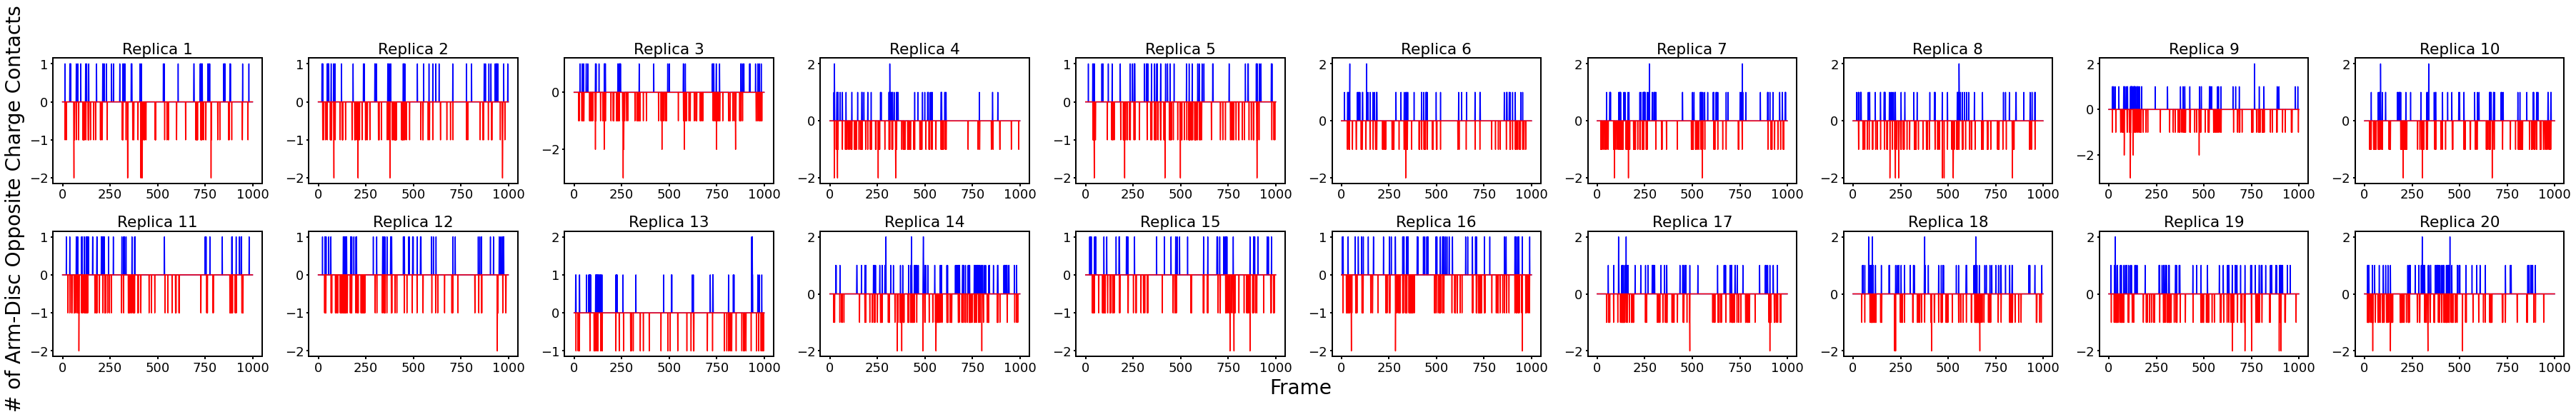

In [38]:
cutoff = 10.

n = 10
m = -(-n_rep//n)
nrows = int(ceil(n_rep/n))
fig0 = plt.figure(figsize=(5*n,3.5*m))

contact_count=[]
top_contact_count=0
bottom_contact_count=0
top_contact_table=np.zeros(5)
bottom_contact_table=np.zeros(5)



for rep in range(n_rep):
    plt.subplot(nrows, n, rep+1)
    
    traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
    traj = mu.load_upside_traj(traj_fn, stride=1)
    
    top_contacts = []
    bottom_contacts = []
    
    
    top_charges =[]
    bottom_charges=[]
    
    for i in range(traj.n_chains):
        top_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i, i*102+2,i*102+15,i*102+16,i*102+55)).tolist())
        bottom_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65)).tolist())
    
    for i in range(traj.n_chains):
        arm_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(i, i*102+66))
        top_pair_list = np.array([(i, j) for i in arm_charges for j in top_charges])
        bottom_pair_list = np.array([(i, j) for i in arm_charges for j in bottom_charges])
        
        top_dists = 10.*md.compute_distances(traj, top_pair_list, periodic=False, opt=True)
        bottom_dists = 10.*md.compute_distances(traj, bottom_pair_list, periodic=False, opt=True)
        is_contact = top_dists < cutoff
        top_contacts.append(is_contact.any(axis=1))
        is_contact = bottom_dists < cutoff
        bottom_contacts.append(is_contact.any(axis=1))

    top_contacts = np.stack(top_contacts, axis=1).sum(axis=1)
    bottom_contacts = np.stack(bottom_contacts, axis=1).sum(axis=1)
    
    rep_top_contact_table=np.bincount(top_contacts)
    rep_bottom_contact_table=np.bincount(bottom_contacts)
    
    top_contact_table += np.pad(rep_top_contact_table,(0,5-rep_top_contact_table.size),'constant')
    bottom_contact_table += np.pad(rep_bottom_contact_table,(0,5-rep_bottom_contact_table.size),'constant')
  
    plt.plot(range(traj.n_frames), top_contacts,color="b")
    plt.plot(range(traj.n_frames), bottom_contacts*-1,color="r")
    plt.title("Replica {}".format(rep+1))
    
    print("{} top contacts in replica {}".format(np.sum(top_contacts),rep))
    print("{} bottom contacts in replica {}".format(np.sum(bottom_contacts),rep))
    
    contact_count.append(np.sum(top_contacts))
    contact_count.append(np.sum(-1*bottom_contacts))
    
    top_contact_count += np.sum(top_contacts)
    bottom_contact_count += np.sum(bottom_contacts)

# expected_val = top_contact_count + bottom_contact_count * 0.5
# chi_sqr = ((top_contact_count - expected_val)**2 + ((bottom_contact_count - expected_val)**2))/expected_val
    
# contact_count=np.array(contact_count)
# print("The mean number of contacts across each replica is {} and the standard deviation is {}.".format(np.mean(contact_count),np.std(contact_count)))
# print("The total number of top contacts is {} and the total number of botom contacts is {}. The chi-squared is {}.".format(top_contact_count,bottom_contact_count,chi_sqr))
# print("The p-value is {}".format(1-stats.chi2.cdf(chi_sqr,1)))

fig0.text(0., 0.5, '# of Arm-Disc Opposite Charge Contacts', fontsize=28, ha='center', va='center', rotation='vertical')
fig0.text(0.5, 0., 'Frame', fontsize=28, ha='center', va='center')
plt.tight_layout()

In [25]:
col_names=["No Contact","Single Contact","Double Contact","Triple Contact","Quadruple Contact"]
obs_data = {
    '': col_names,
    'Top Contact Count': top_contact_table,
    'Bottom Contact Count': bottom_contact_table,
}
pd.DataFrame(obs_data)

,,Top Contact Count,Bottom Contact Count
0,No Contact,18780.0,18049.0
1,Single Contact,1194.0,1875.0
2,Double Contact,26.0,74.0
3,Triple Contact,0.0,2.0
4,Quadruple Contact,0.0,0.0


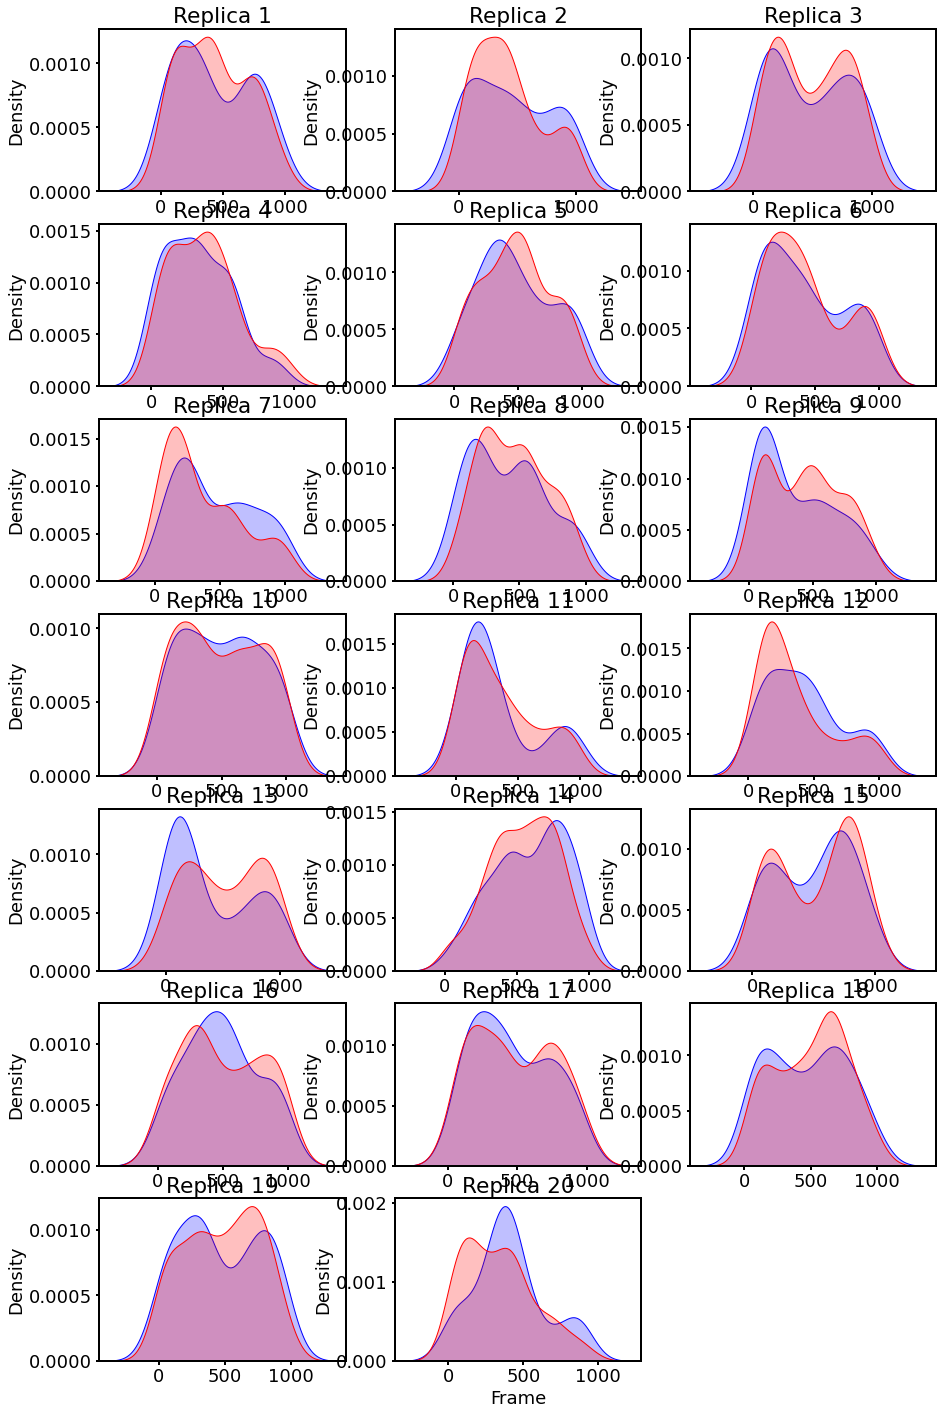

In [26]:
cutoff = 10.

n = 3
m = -(-n_rep//n)
nrows = int(ceil(n_rep/n))
fig0 = plt.figure(figsize=(5*n,3.5*m))

contact_count=[]
top_contact_count=0
bottom_contact_count=0
top_contact_table=np.zeros(5)
bottom_contact_table=np.zeros(5)



for rep in range(n_rep):
    plt.subplot(nrows, n, rep+1)
    
    traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
    traj = mu.load_upside_traj(traj_fn, stride=1)
    
    top_contacts = []
    bottom_contacts = []
    
    arm_charges =[]
    bottom_charges=[]
    
    for i in range(traj.n_chains):
        top_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i, i*102+2,i*102+15,i*102+16,i*102+55)).tolist())
        bottom_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65)).tolist())
    
    for i in range(traj.n_chains):
        arm_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(i, i*102+66))
        top_pair_list = np.array([(i, j) for i in arm_charges for j in top_charges])
        bottom_pair_list = np.array([(i, j) for i in arm_charges for j in bottom_charges])
        
        top_dists = 10.*md.compute_distances(traj, top_pair_list, periodic=False, opt=True)
        bottom_dists = 10.*md.compute_distances(traj, bottom_pair_list, periodic=False, opt=True)
        is_contact = top_dists < cutoff
        top_contacts.append(is_contact.any(axis=1))
        is_contact = bottom_dists < cutoff
        bottom_contacts.append(is_contact.any(axis=1))

    top_contacts = np.stack(top_contacts, axis=1).sum(axis=1)
    bottom_contacts = np.stack(bottom_contacts, axis=1).sum(axis=1)
    
    top_contacts_kde = []
    for i in range(0,len(top_contacts)):
        if top_contacts[i] == 1:
            top_contacts_kde.append(i)
        if top_contacts[i] == 2:
            top_contacts_kde.append(i)
            top_contacts_kde.append(i)
        if top_contacts[i] == 3:
            top_contacts_kde.append(i)
            top_contacts_kde.append(i)
            top_contacts_kde.append(i)
        if bottom_contacts[i] == 4:
            bottom_contacts_kde.append(i)
            bottom_contacts_kde.append(i)
            bottom_contacts_kde.append(i)      
            bottom_contacts_kde.append(i)    

    bottom_contacts_kde = []
    for i in range(0,len(bottom_contacts)):
        if bottom_contacts[i] == 1:
            bottom_contacts_kde.append(i)
        if bottom_contacts[i] == 2:
            bottom_contacts_kde.append(i)
            bottom_contacts_kde.append(i)
        if bottom_contacts[i] == 3:
            bottom_contacts_kde.append(i)
            bottom_contacts_kde.append(i)
            bottom_contacts_kde.append(i)
        if bottom_contacts[i] == 4:
            bottom_contacts_kde.append(i)
            bottom_contacts_kde.append(i)
            bottom_contacts_kde.append(i)      
            bottom_contacts_kde.append(i)
   
    sb.kdeplot(top_contacts_kde,gridsize=1000,shade=True,color="b")
    sb.kdeplot(bottom_contacts_kde,gridsize=1000,shade=True,color="r")
    plt.title("Replica {}".format(rep+1))
    
plt.xlabel('Frame')
plt.ylabel('Density')
plt.show()

In [27]:
col_names=["No Contact","Single Contact","Double Contact","Triple Contact","Quadruple Contact"]
thr_data = {
    '': col_names,
    'Predicted Top Contact': [18750],
    'Predicted Bottom Contact': [],
}
# pd.DataFrame(thr_data)

In [28]:
str([1,5,col_names])

"[1, 5, ['No Contact', 'Single Contact', 'Double Contact', 'Triple Contact', 'Quadruple Contact']]"

# Arm Sticking

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


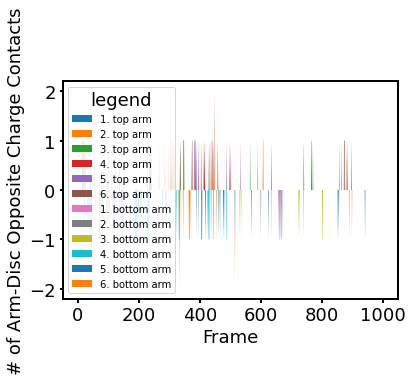

In [29]:
cutoff = 10

top_charges=[]
bottom_charges=[]

for i in range(traj.n_chains):
    top_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i, i*102+2,i*102+15,i*102+16,i*102+55)).tolist())
    bottom_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65)).tolist())

arm_1_top_contacts = []
arm_2_top_contacts = []
arm_3_top_contacts = []
arm_4_top_contacts = []
arm_5_top_contacts = []
arm_6_top_contacts = []

arm_1_bottom_contacts = []
arm_2_bottom_contacts = []
arm_3_bottom_contacts = []
arm_4_bottom_contacts = []
arm_5_bottom_contacts = []
arm_6_bottom_contacts = []

arm_1_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(0, 0*102+66))
arm_2_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(1, 1*102+66))
arm_3_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(2, 2*102+66))
arm_4_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(3, 3*102+66))
arm_5_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(4, 4*102+66))
arm_6_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(5, 5*102+66))
    
top_pair_1_list = np.array([(i, j) for i in arm_1_charges for j in top_charges])
top_pair_2_list = np.array([(i, j) for i in arm_2_charges for j in top_charges])
top_pair_3_list = np.array([(i, j) for i in arm_3_charges for j in top_charges])
top_pair_4_list = np.array([(i, j) for i in arm_4_charges for j in top_charges])
top_pair_5_list = np.array([(i, j) for i in arm_5_charges for j in top_charges])
top_pair_6_list = np.array([(i, j) for i in arm_6_charges for j in top_charges])

bottom_pair_1_list = np.array([(i, j) for i in arm_1_charges for j in bottom_charges])
bottom_pair_2_list = np.array([(i, j) for i in arm_2_charges for j in bottom_charges])
bottom_pair_3_list = np.array([(i, j) for i in arm_3_charges for j in bottom_charges])
bottom_pair_4_list = np.array([(i, j) for i in arm_4_charges for j in bottom_charges])
bottom_pair_5_list = np.array([(i, j) for i in arm_5_charges for j in bottom_charges])
bottom_pair_6_list = np.array([(i, j) for i in arm_6_charges for j in bottom_charges])
    
top_1_dists = 10.*md.compute_distances(traj, top_pair_1_list, periodic=False, opt=True)
top_2_dists = 10.*md.compute_distances(traj, top_pair_2_list, periodic=False, opt=True)
top_3_dists = 10.*md.compute_distances(traj, top_pair_3_list, periodic=False, opt=True)
top_4_dists = 10.*md.compute_distances(traj, top_pair_4_list, periodic=False, opt=True)
top_5_dists = 10.*md.compute_distances(traj, top_pair_5_list, periodic=False, opt=True)
top_6_dists = 10.*md.compute_distances(traj, top_pair_6_list, periodic=False, opt=True)
    
bottom_1_dists = 10.*md.compute_distances(traj, bottom_pair_1_list, periodic=False, opt=True)
bottom_2_dists = 10.*md.compute_distances(traj, bottom_pair_2_list, periodic=False, opt=True)
bottom_3_dists = 10.*md.compute_distances(traj, bottom_pair_3_list, periodic=False, opt=True)
bottom_4_dists = 10.*md.compute_distances(traj, bottom_pair_4_list, periodic=False, opt=True)
bottom_5_dists = 10.*md.compute_distances(traj, bottom_pair_5_list, periodic=False, opt=True)
bottom_6_dists = 10.*md.compute_distances(traj, bottom_pair_6_list, periodic=False, opt=True)
    
is_contact = top_1_dists < cutoff
arm_1_top_contacts.append(is_contact.any(axis=1))
is_contact = top_2_dists < cutoff
arm_2_top_contacts.append(is_contact.any(axis=1))
is_contact = top_3_dists < cutoff
arm_3_top_contacts.append(is_contact.any(axis=1))
is_contact = top_4_dists < cutoff
arm_4_top_contacts.append(is_contact.any(axis=1))
is_contact = top_5_dists < cutoff
arm_5_top_contacts.append(is_contact.any(axis=1))
is_contact = top_6_dists < cutoff
arm_6_top_contacts.append(is_contact.any(axis=1))

is_contact = bottom_1_dists < cutoff
arm_1_bottom_contacts.append(is_contact.any(axis=1))
is_contact = bottom_2_dists < cutoff
arm_2_bottom_contacts.append(is_contact.any(axis=1))
is_contact = bottom_3_dists < cutoff
arm_3_bottom_contacts.append(is_contact.any(axis=1))
is_contact = bottom_4_dists < cutoff
arm_4_bottom_contacts.append(is_contact.any(axis=1))
is_contact = bottom_5_dists < cutoff
arm_5_bottom_contacts.append(is_contact.any(axis=1))
is_contact = bottom_6_dists < cutoff
arm_6_bottom_contacts.append(is_contact.any(axis=1))

plt.figure(facecolor='w')
stkplt_labels=[]
for k in ['top','bottom']:
    for m in range(6):
        stkplt_labels.append("{}. {} arm".format(m+1,k))
plt.stackplot(range(traj.n_frames), arm_1_top_contacts[0],arm_2_top_contacts[0],arm_3_top_contacts[0],arm_4_top_contacts[0],arm_5_top_contacts,arm_6_top_contacts[0],arm_1_bottom_contacts[0]*-1,arm_2_bottom_contacts[0]*-1,arm_3_bottom_contacts[0]*-1,arm_4_bottom_contacts[0]*-1,arm_5_bottom_contacts[0]*-1,arm_6_bottom_contacts[0]*-1,labels=stkplt_labels,baseline="zero")
plt.legend(title="legend",prop={'size':10},loc="center left")
    
plt.xlabel('Frame',loc="center")
plt.ylabel('# of Arm-Disc Opposite Charge Contacts')
plt.show()
    


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

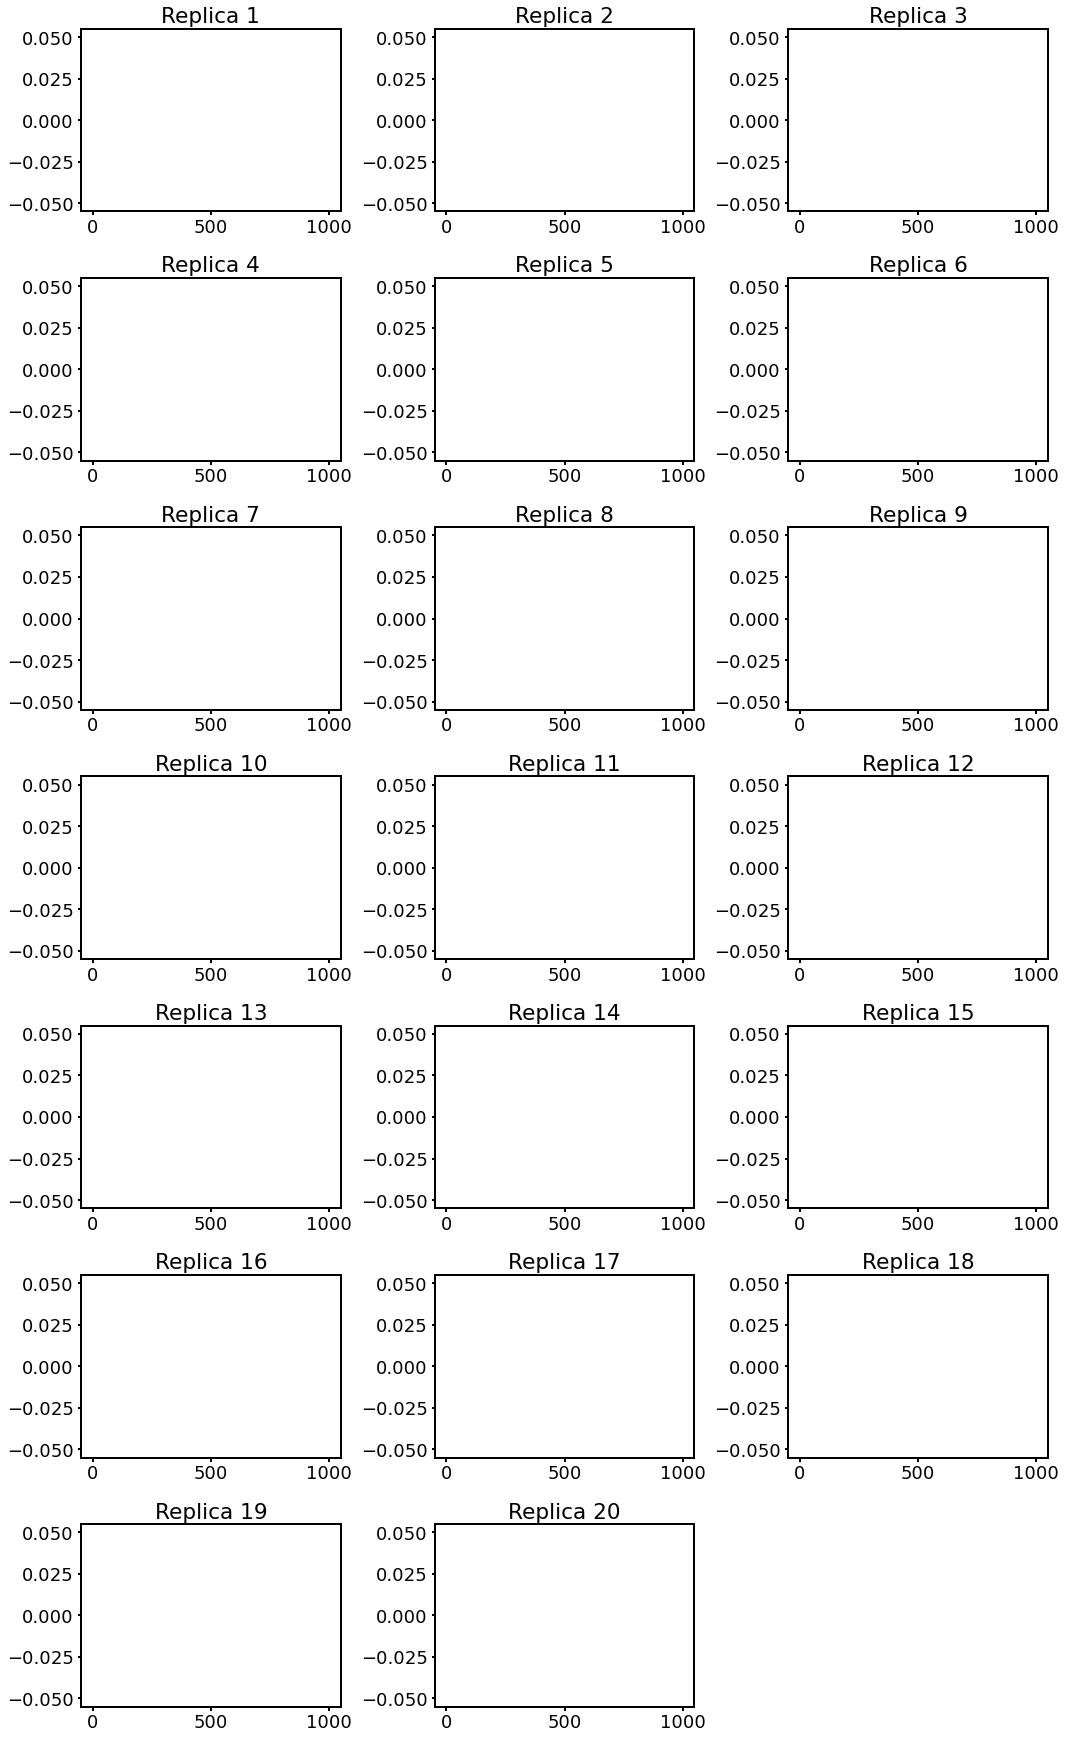

In [37]:
cutoff = 1

n = 3
m = -(-n_rep//n)
nrows = int(ceil(n_rep/n))
fig0 = plt.figure(figsize=(5*n,3.5*m))


stkplt_labels=[]
for k in ['top','bottom']:
    for m in range(5):
        stkplt_labels.append("{}. {} arm".format(m+1,k))

for rep in range(n_rep):
    plt.subplot(nrows, n, rep+1)
    
    traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
    traj = mu.load_upside_traj(traj_fn, stride=1)
    
    top_charges=[]
    bottom_charges=[]
    
    for i in range(traj.n_chains):
        top_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i, i*102+2,i*102+15,i*102+16,i*102+55)).tolist())
        bottom_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65)).tolist())

    arm_1_top_contacts = []
    arm_2_top_contacts = []
    arm_3_top_contacts = []
    arm_4_top_contacts = []
    arm_5_top_contacts = []
    arm_6_top_contacts = []

    arm_1_bottom_contacts = []
    arm_2_bottom_contacts = []
    arm_3_bottom_contacts = []
    arm_4_bottom_contacts = []
    arm_5_bottom_contacts = []
    arm_6_bottom_contacts = []

    arm_1_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(0, 0*102+66))
    arm_2_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(1, 1*102+66))
    arm_3_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(2, 2*102+66))
    arm_4_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(3, 3*102+66))
    arm_5_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(4, 4*102+66))
    arm_6_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(5, 5*102+66))

    top_pair_1_list = np.array([(i, j) for i in arm_1_charges for j in top_charges])
    top_pair_2_list = np.array([(i, j) for i in arm_2_charges for j in top_charges])
    top_pair_3_list = np.array([(i, j) for i in arm_3_charges for j in top_charges])
    top_pair_4_list = np.array([(i, j) for i in arm_4_charges for j in top_charges])
    top_pair_5_list = np.array([(i, j) for i in arm_5_charges for j in top_charges])
    top_pair_6_list = np.array([(i, j) for i in arm_6_charges for j in top_charges])

    bottom_pair_1_list = np.array([(i, j) for i in arm_1_charges for j in bottom_charges])
    bottom_pair_2_list = np.array([(i, j) for i in arm_2_charges for j in bottom_charges])
    bottom_pair_3_list = np.array([(i, j) for i in arm_3_charges for j in bottom_charges])
    bottom_pair_4_list = np.array([(i, j) for i in arm_4_charges for j in bottom_charges])
    bottom_pair_5_list = np.array([(i, j) for i in arm_5_charges for j in bottom_charges])
    bottom_pair_6_list = np.array([(i, j) for i in arm_6_charges for j in bottom_charges])

    top_1_dists = 10.*md.compute_distances(traj, top_pair_1_list, periodic=False, opt=True)
    top_2_dists = 10.*md.compute_distances(traj, top_pair_2_list, periodic=False, opt=True)
    top_3_dists = 10.*md.compute_distances(traj, top_pair_3_list, periodic=False, opt=True)
    top_4_dists = 10.*md.compute_distances(traj, top_pair_4_list, periodic=False, opt=True)
    top_5_dists = 10.*md.compute_distances(traj, top_pair_5_list, periodic=False, opt=True)
    top_6_dists = 10.*md.compute_distances(traj, top_pair_6_list, periodic=False, opt=True)

    bottom_1_dists = 10.*md.compute_distances(traj, bottom_pair_1_list, periodic=False, opt=True)
    bottom_2_dists = 10.*md.compute_distances(traj, bottom_pair_2_list, periodic=False, opt=True)
    bottom_3_dists = 10.*md.compute_distances(traj, bottom_pair_3_list, periodic=False, opt=True)
    bottom_4_dists = 10.*md.compute_distances(traj, bottom_pair_4_list, periodic=False, opt=True)
    bottom_5_dists = 10.*md.compute_distances(traj, bottom_pair_5_list, periodic=False, opt=True)
    bottom_6_dists = 10.*md.compute_distances(traj, bottom_pair_6_list, periodic=False, opt=True)

    is_contact = top_1_dists < cutoff
    arm_1_top_contacts.append(is_contact.any(axis=1))
    is_contact = top_2_dists < cutoff
    arm_2_top_contacts.append(is_contact.any(axis=1))
    is_contact = top_3_dists < cutoff
    arm_3_top_contacts.append(is_contact.any(axis=1))
    is_contact = top_4_dists < cutoff
    arm_4_top_contacts.append(is_contact.any(axis=1))
    is_contact = top_5_dists < cutoff
    arm_5_top_contacts.append(is_contact.any(axis=1))
    is_contact = top_6_dists < cutoff
    arm_6_top_contacts.append(is_contact.any(axis=1))

    is_contact = bottom_1_dists < cutoff
    arm_1_bottom_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_2_dists < cutoff
    arm_2_bottom_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_3_dists < cutoff
    arm_3_bottom_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_4_dists < cutoff
    arm_4_bottom_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_5_dists < cutoff
    arm_5_bottom_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_6_dists < cutoff
    arm_6_bottom_contacts.append(is_contact.any(axis=1))
    
    plt.stackplot(range(traj.n_frames), arm_1_top_contacts[0],arm_2_top_contacts[0],arm_3_top_contacts[0],arm_4_top_contacts[0],arm_5_top_contacts,arm_6_top_contacts[0],arm_1_bottom_contacts[0]*-1,arm_2_bottom_contacts[0]*-1,arm_3_bottom_contacts[0]*-1,arm_4_bottom_contacts[0]*-1,arm_5_bottom_contacts[0]*-1,arm_6_bottom_contacts[0]*-1,labels=stkplt_labels,baseline="zero")
    plt.title("Replica {}".format(rep+1))
    #print(arm_1_top_contacts[0])

#plt.legend(title="legend",prop={'size':8},loc="center left")
#fig0.text(0., 0.5, '# of Arm-Disc Opposite Charge Contacts', fontsize=28, ha='center', va='center', rotation='vertical')
#fig0.text(0.5, 0., 'Frame', fontsize=28, ha='center', va='center')
plt.tight_layout()

In [31]:
bob=['x','y','z']
bob=('x','y','z')

[[bob[i],i,'temp'] for i in range(3)]

[['x', 0, 'temp'], ['y', 1, 'temp'], ['z', 2, 'temp']]

# Dipole

In [32]:
#use mdtraj package to find dipole at each frame then find average dipole across all frames

#creating array of charges
trajCharges=np.zeros(traj.n_atoms)
for i in acid_sele:
    trajCharges[i]=-1
for i in base_sele:
    trajCharges[i]=1
#(1000,3) array with dipole moment at each frame
trajDipoleMoments=md.dipole_moments(traj,trajCharges)
#calculating stats
print("mean dipole: {}".format(np.mean(trajDipoleMoments,axis=0)))
print("std dipole: {}".format(np.std(trajDipoleMoments,axis=0)))
trajDipoleMomentMagnitude = []
for i in range (0,999):
    trajDipoleMomentMagnitude.append(np.linalg.norm(trajDipoleMoments[i],ord=2))
print("mean magnitude of dipole: {}".format(np.mean(trajDipoleMomentMagnitude)))
print("std of magnitude of dipole: {}".format(np.std(trajDipoleMomentMagnitude)))

mean dipole: [-3.99518427 15.9590569  13.00091345]
std dipole: [26.98356691 22.42231206 28.71075114]
mean magnitude of dipole: 46.59945986685625
std of magnitude of dipole: 18.0250320238595


# Rg

## Accross single replica trajectory

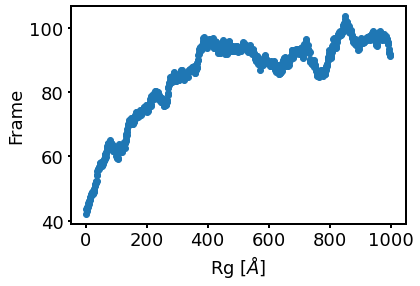

In [33]:
rep = 0

traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
traj = mu.load_upside_traj(traj_fn, stride=1)

rg = 10.*md.compute_rg(traj)
x = np.arange(traj.n_frames)

plt.scatter(x, rg)
plt.xlabel("Rg [$\AA$]")
plt.ylabel("Frame") #change````````````````````````````````````````````````````````````````````````````````````````````
plt.show()

## Melting curves

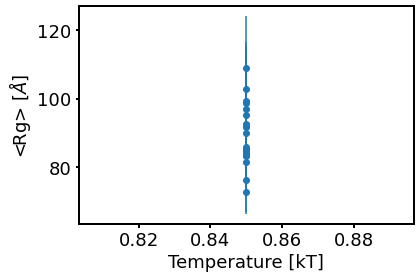

In [34]:
equil_frac = 1/4 # fraction of frames to discard for equilibration

temps = np.zeros(n_rep)
rg_mu = np.zeros(n_rep)
rg_std = np.zeros(n_rep)

for rep in range(n_rep):
    traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
    
    with tb.open_file(traj_fn) as t:
        temps[rep] = t.root.output.temperature[0]
        
    traj = mu.load_upside_traj(traj_fn, stride=1)
    rg = 10.*md.compute_rg(traj)[int(traj.n_frames*equil_frac):]
    rg_mu[rep] = rg.mean()
    rg_std[rep] = rg.std()
    
plt.errorbar(temps, rg_mu, yerr=rg_std, fmt='o--')
plt.xlabel("Temperature [kT]")
plt.ylabel("<Rg> [$\AA$]")
plt.show()

# RMSD

## Accross single replica trajectory

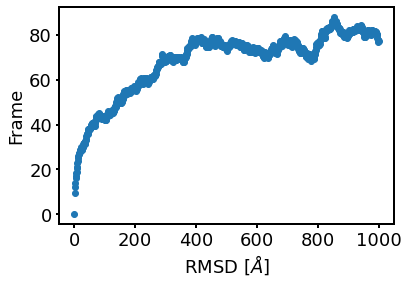

In [35]:
rep = 0

traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
traj = mu.load_upside_traj(traj_fn, stride=1)

# Choose a reference structure. Either load from a file...
ref_fn = base_dir + "{}.pdb".format(pdb_id)
ref = md.load(ref_fn)
# Or pick a frame in the trajectory of interest. Uncomment the following line for that
# native = traj[0]

sele_CA_ref = ref.top.select("name CA") # Select CA for reference
sele_CA_traj = traj.top.select("name CA") # Select CA for traj

rmsd = 10.*md.rmsd(traj.atom_slice(sele_CA_traj), ref.atom_slice(sele_CA_ref))
x = np.arange(traj.n_frames)

plt.scatter(x, rmsd)
plt.xlabel("RMSD [$\AA$]")
plt.ylabel("Frame")
plt.show()

## Distribution

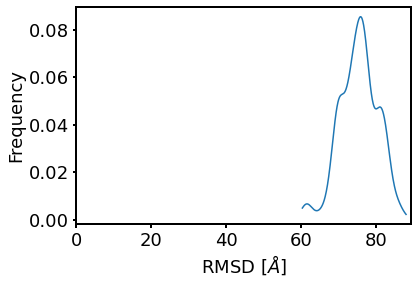

In [36]:
from scipy.stats import gaussian_kde

rep = 0
equil_frac = 1/4 # fraction of frames to discard for equilibration

traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
traj = mu.load_upside_traj(traj_fn, stride=1)

# Choose a reference structure. Either load from a file...
ref_fn = base_dir + "{}.pdb".format(pdb_id)
ref = md.load(ref_fn)
# Or pick a frame in the trajectory of interest. Uncomment the following line for that
# native = traj[0]

sele_CA_ref = ref.top.select("name CA") # Select CA for reference
sele_CA_traj = traj.top.select("name CA") # Select CA for traj

rmsd = 10.*md.rmsd(traj.atom_slice(sele_CA_traj), ref.atom_slice(sele_CA_ref))[int(traj.n_frames*equil_frac):]
dat_min = rmsd.min()
dat_max = rmsd.max()
x = np.linspace(dat_min, dat_max, num=int((dat_max-dat_min)/8.*(128+1)))
kernel = gaussian_kde(rmsd)
y = kernel(x)

plt.plot(x, y)
plt.xlim(left=0)
plt.xlabel("RMSD [$\AA$]")
plt.ylabel("Frequency")
plt.show()